In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/higgs-boson-dataset/Dataset/Dataset Details.docx
/kaggle/input/higgs-boson-dataset/Dataset/Dataset Details.pdf
/kaggle/input/higgs-boson-dataset/Dataset/In-depth details.pdf
/kaggle/input/higgs-boson-dataset/Dataset/training.csv
/kaggle/input/higgs-boson-dataset/Dataset/Searching for Higgs Boson Decay Modes with Deep Learning.pdf


In [2]:
df = pd.read_csv("/kaggle/input/higgs-boson-dataset/Dataset/training.csv")
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EventId,250000.0,224999.500000,72168.927986,100000.000000,162499.750000,224999.500000,287499.250000,349999.000000
DER_mass_MMC,250000.0,-49.023079,406.345647,-999.000000,78.100750,105.012000,130.606250,1192.026000
DER_mass_transverse_met_lep,250000.0,49.239819,35.344886,0.000000,19.241000,46.524000,73.598000,690.075000
DER_mass_vis,250000.0,81.181982,40.828691,6.329000,59.388750,73.752000,92.259000,1349.351000
DER_pt_h,250000.0,57.895962,63.655682,0.000000,14.068750,38.467500,79.169000,2834.999000
DER_deltaeta_jet_jet,250000.0,-708.420675,454.480565,-999.000000,-999.000000,-999.000000,0.490000,8.503000
DER_mass_jet_jet,250000.0,-601.237051,657.972302,-999.000000,-999.000000,-999.000000,83.446000,4974.979000
DER_prodeta_jet_jet,250000.0,-709.356603,453.019877,-999.000000,-999.000000,-999.000000,-4.593000,16.690000
DER_deltar_tau_lep,250000.0,2.373100,0.782911,0.208000,1.810000,2.491500,2.961000,5.684000
DER_pt_tot,250000.0,18.917332,22.273494,0.000000,2.841000,12.315500,27.591000,2834.999000


In [5]:
# drop the unwanted columns
ndf = df.drop('EventId', axis=1)

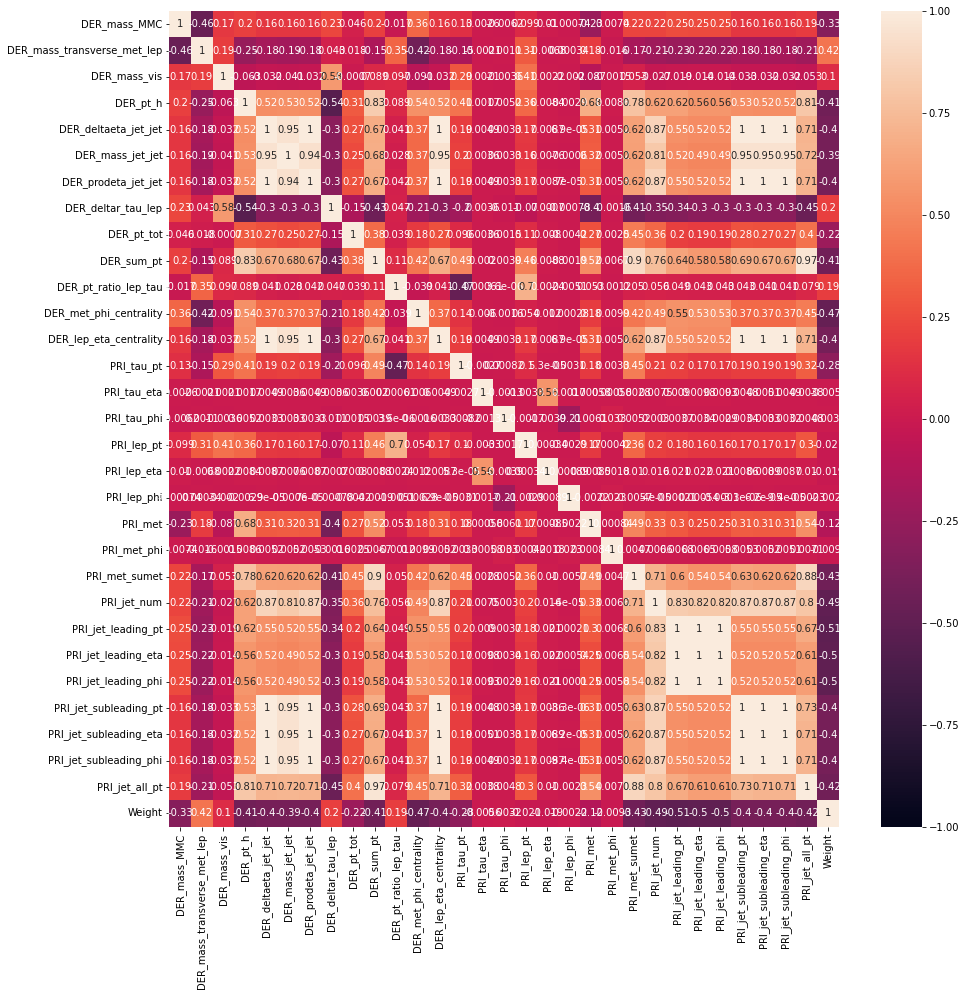

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(ndf.corr(), annot=True, vmin=-1, vmax=+1)
plt.show()

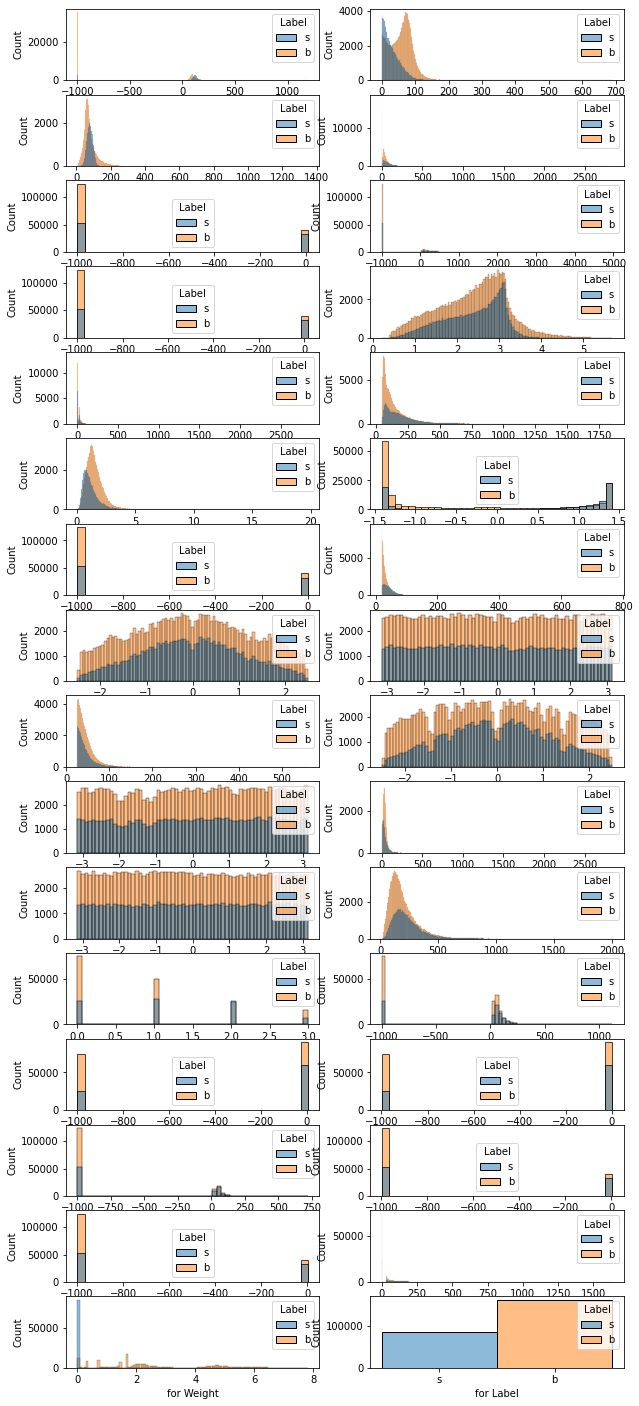

In [28]:
# box plot per categorical variable
plt.figure(figsize=(10,25))
for i,col in enumerate(ndf.columns.to_list()):
    plt.subplot(16,2,i+1)
    sns.histplot(x=col, hue='Label',data=ndf)
    plt.xlabel(f"for {col}")
plt.show()

In [8]:
# removing multicollinear columns
# standardize the input features 

In [ ]:
# NN model